In [1]:
from PIL import Image
import numpy as np

In [2]:
image = Image.open("7.jpg")

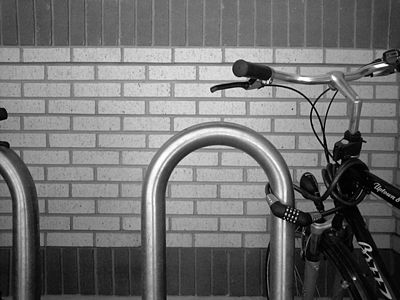

In [3]:
image

In [4]:
gray_img = image.convert('L')

In [5]:
image_arr = np.array(gray_img)

In [6]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

In [7]:
Gx = np.zeros(image_arr.shape)
Gy = np.zeros(image_arr.shape)

In [8]:
for i in range(1, image_arr.shape[0]-1):
    for j in range(1, image_arr.shape[1]-1):
        Gx[i,j] = np.sum(sobel_x * image_arr[i-1:i+2, j-1:j+2])
        Gy[i,j] = np.sum(sobel_y * image_arr[i-1:i+2, j-1:j+2])
            
    gradient = np.sqrt(np.square(Gx) + np.square(Gy))

In [9]:
gradient *= 255.0 / gradient.max()

In [10]:
new_img = Image.fromarray(gradient.astype(np.uint8))

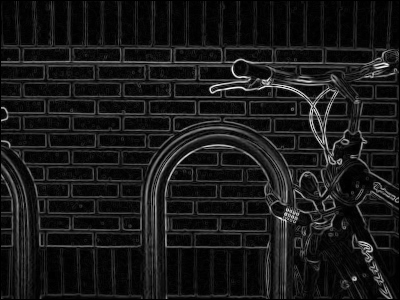

In [11]:
new_img

In [144]:
Gx_img = Image.fromarray((Gx/np.max(np.abs(Gx))*255).astype(np.uint8))
Gy_img = Image.fromarray((Gy/np.max(np.abs(Gy))*255).astype(np.uint8))

In [145]:
Gx_img.show()

In [146]:
Gy_img.show()

In [12]:
#With OpenCV

In [13]:
import cv2

In [19]:
img = cv2.imread("7.jpg")

In [20]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [21]:
cvX = cv2.filter2D(gray_img, -1, sobel_x)
cvY = cv2.filter2D(gray_img, -1, sobel_y)

In [22]:
cv_gradient = cv2.addWeighted(cv2.convertScaleAbs(cvX), 0.5, cv2.convertScaleAbs(cvY), 0.5, 0)

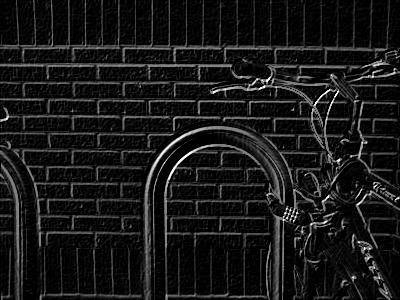

In [23]:
cv_img = Image.fromarray(cv_gradient.astype(np.uint8))
cv_img